In [1]:
%pip install ../../mlrose/
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

Processing /Users/VivianNTran/Documents/CS7641 - ML/Assignment 2/mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=102999 sha256=bf9e5de7007a4e5ba49dcf97211b9eab14c09fde08d488935117be29025580a6
  Stored in directory: /private/var/folders/rk/9q8_q_l50ls0c1pdxg38z9m80000gp/T/pip-ephem-wheel-cache-i53d2fef/wheels/6d/5b/da/7cf5d7915d22f9006694bfefef2b605b6ed6540017cd5e1e1a
Successfully built mlrose-hiive
  Attempting uninstall: mlrose-hiive
    Found existing installation: mlrose-hiive 2.2.4
    Uninstalling mlrose-hiive-2.2.4:
      Successfully uninstalled mlrose-hiive-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [73]:
RANDOM_STATE = 101
seeds = [1, 7, 9, 101, 127]
max_iters = 150
max_attempts = 150
length = 80

In [74]:
# Define fitness function
fitness = mlrose.FourPeaks()
problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness, maximize = True)

### RO Algorithm Experiments

In [75]:
# Define fitness function
problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness, maximize = True)

In [76]:
# Randomized Hill Climbing
avg_rhc_run = []
for restart in [0, 25, 50, 75, 100]:
    restart_array = []
    for seed in seeds:
        problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness, maximize = True)
        rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem = problem, restarts = restart, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        restart_array.append(rhc_fitness_curve)
    avg_rhc_run.append(restart_array)


# average the curves
rhc_avgs = []
for i in range(len(avg_rhc_run)):
    avg = []
    for j in range(len(avg_rhc_run[i])):
        avg.append(avg_rhc_run[i][j][:,0])
    rhc_avgs.append(avg)

# Generating lines and confidence intervals
a = np.array(rhc_avgs[0])
rhc_restart_0 = np.mean(a, axis=0)
rhc_restart_0_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(rhc_avgs[1])
rhc_restart_25 = np.mean(a, axis=0)
rhc_restart_25_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(rhc_avgs[2])
rhc_restart_50 = np.mean(a, axis=0)
rhc_restart_50_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(rhc_avgs[3])
rhc_restart_75 = np.mean(a, axis=0)
rhc_restart_75_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(rhc_avgs[4])
rhc_restart_100 = np.mean(a, axis=0)
rhc_restart_100_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

In [77]:
# Simulated Annealing
avg_sa_run_temp = []
for temp in [.25, .5, 1]:
    temp_array = []
    for seed in seeds:
        problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness, maximize = True)
        schedule = mlrose.GeomDecay(init_temp = temp)
        sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem = problem, schedule = schedule, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        temp_array.append(sa_fitness_curve)
    avg_sa_run_temp.append(temp_array)

# average the curves
sa_avgs = []
for i in range(len(avg_sa_run_temp)):
    avg = []
    for j in range(len(avg_sa_run_temp[i])):
        avg.append(avg_sa_run_temp[i][j][:,0])
    sa_avgs.append(avg)

a = np.array(sa_avgs[0])
sa_temp_25 = np.mean(a, axis=0)
sa_temp_25_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(sa_avgs[1])
sa_temp_5 = np.mean(a, axis=0)
sa_temp_5_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(sa_avgs[2])
sa_temp_1 = np.mean(a, axis=0)
sa_temp_1_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

In [49]:
# Genetic Algorithm
avg_ga_run_pop = []
avg_ga_run_mutate = []
    
for pop_size in [50, 100, 500]:
    pop_array = []
    for seed in seeds:
        problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness, maximize = True)
        ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem = problem, pop_size = pop_size, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        pop_array.append(ga_fitness_curve)
    avg_ga_run_pop.append(pop_array)
        
    
for mutation in [0.1, 0.5, 0.75]:
    mutate_array = []
    for seed in seeds:
        problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness, maximize = True)
        ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem = problem, mutation_prob = mutation, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        mutate_array.append(ga_fitness_curve)
    avg_ga_run_mutate.append(mutate_array)

# average the curves
ga_avgs = []
for i in range(len(avg_ga_run_pop)):
    avg = []
    for j in range(len(avg_ga_run_pop[i])):
        avg.append(avg_ga_run_pop[i][j][:,0])
    ga_avgs.append(avg)

a = np.array(ga_avgs[0])
ga_pop_50 = np.mean(a, axis=0)
ga_pop_50_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(ga_avgs[1])
ga_pop_100 = np.mean(a, axis=0)
ga_pop_100_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(ga_avgs[2])
ga_pop_500 = np.mean(a, axis=0)
ga_pop_500_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

# average the curves
ga_avgs = []
for i in range(len(avg_ga_run_mutate)):
    avg = []
    for j in range(len(avg_ga_run_mutate[i])):
        avg.append(avg_ga_run_mutate[i][j][:,0])
    ga_avgs.append(avg)

a = np.array(ga_avgs[0])
ga_mutate_1 = np.mean(a, axis=0)
ga_mutate_1_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(ga_avgs[1])
ga_mutate_5 = np.mean(a, axis=0)
ga_mutate_5_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(ga_avgs[2])
ga_mutate_75 = np.mean(a, axis=0)
ga_mutate_75_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

In [50]:
# MIMIC
avg_mimic_run_pop = []
avg_mimic_run_pct = []

for pop_size in [50, 100, 500]:
    pop_array = []
    for seed in seeds:
        problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness, maximize = True)
        mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(problem = problem, pop_size = pop_size, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        pop_array.append(mimic_fitness_curve)
    avg_mimic_run_pop.append(pop_array)
        
    
for pct in [0.2, 0.5, 0.8]:
    pct_array = []
    for seed in seeds:
        problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness, maximize = True)
        mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(problem = problem, keep_pct = pct, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        pct_array.append(mimic_fitness_curve)
    avg_mimic_run_pct.append(pct_array)

# average the curves
mimic_avgs = []
for i in range(len(avg_mimic_run_pop)):
    avg = []
    for j in range(len(avg_mimic_run_pop[i])):
        avg.append(avg_mimic_run_pop[i][j][:,0])
    mimic_avgs.append(avg)

a = np.array(mimic_avgs[0])
mimic_pop_50 = np.mean(a, axis=0)
mimic_pop_50_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(mimic_avgs[1])
mimic_pop_100 = np.mean(a, axis=0)
mimic_pop_100_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(mimic_avgs[2])
mimic_pop_500 = np.mean(a, axis=0)
mimic_pop_500_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

# average the curves
mimic_avgs = []
for i in range(len(avg_mimic_run_pct)):
    avg = []
    for j in range(len(avg_mimic_run_pct[i])):
        avg.append(avg_mimic_run_pct[i][j][:,0])
    mimic_avgs.append(avg)

a = np.array(mimic_avgs[0])
mimic_pct_2 = np.mean(a, axis=0)
mimic_pct_2_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(mimic_avgs[1])
mimic_pct_5 = np.mean(a, axis=0)
mimic_pct_5_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(mimic_avgs[2])
mimic_pct_8 = np.mean(a, axis=0)
mimic_pct_8_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

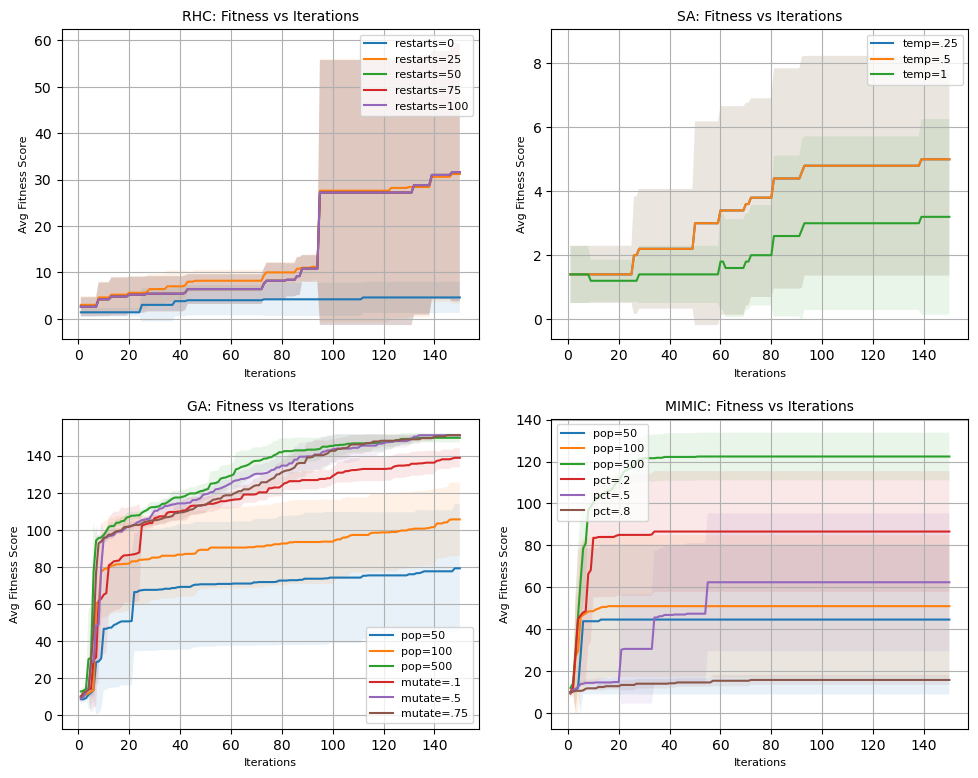

In [78]:
iterations = range(1, max_iters+1)

fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0, 0].grid()
axs[0, 0].plot(iterations, rhc_restart_0, label = 'restarts=0')
axs[0, 0].fill_between(iterations, (rhc_restart_0 - rhc_restart_0_ci), (rhc_restart_0 + rhc_restart_0_ci), alpha=0.1)
axs[0, 0].plot(iterations, rhc_restart_25, label = 'restarts=25')
axs[0, 0].fill_between(iterations, (rhc_restart_25 - rhc_restart_25_ci), (rhc_restart_25 + rhc_restart_25_ci), alpha=0.1)
axs[0, 0].plot(iterations, rhc_restart_50, label = 'restarts=50')
axs[0, 0].fill_between(iterations, (rhc_restart_50 - rhc_restart_50_ci), (rhc_restart_50 + rhc_restart_50_ci), alpha=0.1)
axs[0, 0].plot(iterations, rhc_restart_75, label = 'restarts=75')
axs[0, 0].fill_between(iterations, (rhc_restart_75 - rhc_restart_75_ci), (rhc_restart_75 + rhc_restart_75_ci), alpha=0.1)
axs[0, 0].plot(iterations, rhc_restart_100, label = 'restarts=100')
axs[0, 0].fill_between(iterations, (rhc_restart_100 - rhc_restart_100_ci), (rhc_restart_100 + rhc_restart_100_ci), alpha=0.1)
axs[0, 0].set_title('RHC: Fitness vs Iterations', fontsize=10)
axs[0, 0].set_ylabel('Avg Fitness Score', fontsize=8)
axs[0, 0].set_xlabel('Iterations', fontsize=8)
axs[0, 0].legend(loc='best', fontsize=8)
axs[0, 1].grid()
axs[0, 1].plot(iterations, sa_temp_25, label = 'temp=.25')
axs[0, 1].fill_between(iterations, (sa_temp_25 - sa_temp_25_ci), (sa_temp_25 + sa_temp_25_ci), alpha=0.1)
axs[0, 1].plot(iterations, sa_temp_5, label = 'temp=.5')
axs[0, 1].fill_between(iterations, (sa_temp_5 - sa_temp_5_ci), (sa_temp_5 + sa_temp_5_ci), alpha=0.1)
axs[0, 1].plot(iterations, sa_temp_1, label = 'temp=1')
axs[0, 1].fill_between(iterations, (sa_temp_1 - sa_temp_1_ci), (sa_temp_1 + sa_temp_1_ci), alpha=0.1)
axs[0, 1].set_title('SA: Fitness vs Iterations', fontsize=10)
axs[0, 1].set_ylabel('Avg Fitness Score', fontsize=8)
axs[0, 1].set_xlabel('Iterations', fontsize=8)
axs[0, 1].legend(loc='best', fontsize=8)
axs[1, 0].grid()
axs[1, 0].plot(iterations, ga_pop_50, label = 'pop=50')
axs[1, 0].fill_between(iterations, (ga_pop_50 - ga_pop_50_ci), (ga_pop_50 + ga_pop_50_ci), alpha=0.1)
axs[1, 0].plot(iterations, ga_pop_100, label = 'pop=100')
axs[1, 0].fill_between(iterations, (ga_pop_100 - ga_pop_100_ci), (ga_pop_100 + ga_pop_100_ci), alpha=0.1)
axs[1, 0].plot(iterations, ga_pop_500, label = 'pop=500')
axs[1, 0].fill_between(iterations, (ga_pop_500 - ga_pop_500_ci), (ga_pop_500 + ga_pop_500_ci), alpha=0.1)
axs[1, 0].plot(iterations, ga_mutate_1, label = 'mutate=.1')
axs[1, 0].fill_between(iterations, (ga_mutate_1 - ga_mutate_1_ci), (ga_mutate_1 + ga_mutate_1_ci), alpha=0.1)
axs[1, 0].plot(iterations, ga_mutate_5, label = 'mutate=.5')
axs[1, 0].fill_between(iterations, (ga_mutate_5 - ga_mutate_5_ci), (ga_mutate_5 + ga_mutate_5_ci), alpha=0.1)
axs[1, 0].plot(iterations, ga_mutate_75, label = 'mutate=.75')
axs[1, 0].fill_between(iterations, (ga_mutate_75 - ga_mutate_75_ci), (ga_mutate_75 + ga_mutate_75_ci), alpha=0.1)
axs[1, 0].set_title('GA: Fitness vs Iterations', fontsize=10)
axs[1, 0].set_ylabel('Avg Fitness Score', fontsize=8)
axs[1, 0].set_xlabel('Iterations', fontsize=8)
axs[1, 0].legend(loc='best', fontsize=8)
axs[1, 1].grid()
axs[1, 1].plot(iterations, mimic_pop_50, label = 'pop=50')
axs[1, 1].fill_between(iterations, (mimic_pop_50 - mimic_pop_50_ci), (mimic_pop_50 + mimic_pop_50_ci), alpha=0.1)
axs[1, 1].plot(iterations, mimic_pop_100, label = 'pop=100')
axs[1, 1].fill_between(iterations, (mimic_pop_100 - mimic_pop_100_ci), (mimic_pop_100 + mimic_pop_100_ci), alpha=0.1)
axs[1, 1].plot(iterations, mimic_pop_500, label = 'pop=500')
axs[1, 1].fill_between(iterations, (mimic_pop_500 - mimic_pop_500_ci), (mimic_pop_500 + mimic_pop_500_ci), alpha=0.1)
axs[1, 1].plot(iterations, mimic_pct_2, label = 'pct=.2')
axs[1, 1].fill_between(iterations, (mimic_pct_2 - mimic_pct_2_ci), (mimic_pct_2 + mimic_pct_2_ci), alpha=0.1)
axs[1, 1].plot(iterations, mimic_pct_5, label = 'pct=.5')
axs[1, 1].fill_between(iterations, (mimic_pct_5 - mimic_pct_5_ci), (mimic_pct_5 + mimic_pct_5_ci), alpha=0.1)
axs[1, 1].plot(iterations, mimic_pct_8, label = 'pct=.8')
axs[1, 1].fill_between(iterations, (mimic_pct_8 - mimic_pct_8_ci), (mimic_pct_8 + mimic_pct_8_ci), alpha=0.1)
axs[1, 1].set_title('MIMIC: Fitness vs Iterations', fontsize=10)
axs[1, 1].set_ylabel('Avg Fitness Score', fontsize=8)
axs[1, 1].set_xlabel('Iterations', fontsize=8)
axs[1, 1].legend(loc='best', fontsize=8)
fig.tight_layout(pad = 1.5)
plt.savefig('plots/fourpeaks_fitness_experiments.png', dpi=1200)

### Feature Evaluation Analysis

In [52]:
problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness, maximize = True)
iterations = range(10, 160, 10)

In [53]:
# Randomized Hill Climbing
rhc_stats = []
rhc_curves = []
for seed in seeds:
    

    rhc = mlrose.RHCRunner(problem=problem,
                    experiment_name='four_peaks_rhc',
                    output_directory='./feval_outputs',
                    seed=seed,
                    iteration_list=[*iterations],
                    max_attempts=max_attempts,
                    restart_list=[0, 25, 75, 100])   

    # the two data frames will contain the results
    rhc_df_run_stats, rhc_df_run_curves = rhc.run()
    rhc_stats.append(rhc_df_run_stats)
    rhc_curves.append(rhc_df_run_curves)

In [54]:
rhc_best_fitness = pd.DataFrame()
for i in range(len(rhc_curves)):
    best_fitness = rhc_curves[i]['Fitness'].max()
    best_runs = rhc_curves[i][rhc_curves[i]['Fitness'] == best_fitness]
    rhc_best_fitness = pd.concat([rhc_best_fitness, best_runs])

In [55]:
rhc_best_fitness

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
748,147,0.053299,95.0,605.0,25,150,3
749,148,0.053334,95.0,606.0,25,150,3
750,149,0.053369,95.0,607.0,25,150,3
751,150,0.053404,95.0,608.0,25,150,3
4649,147,0.053299,95.0,605.0,75,150,3
...,...,...,...,...,...,...,...
17999,146,0.025936,17.0,2573.0,100,150,16
18000,147,0.025969,17.0,2574.0,100,150,16
18001,148,0.026004,17.0,2575.0,100,150,16
18002,149,0.026039,17.0,2576.0,100,150,16


In [56]:
rhc_min_evals = rhc_best_fitness['FEvals'].min()
rhc_best_curve_run = rhc_best_fitness[rhc_best_fitness['FEvals'] == rhc_min_evals]

In [57]:
rhc_best_curve_run

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
748,147,0.053299,95.0,605.0,25,150,3
4649,147,0.053299,95.0,605.0,75,150,3
16050,147,0.053299,95.0,605.0,100,150,3


In [79]:
# Simulated Annealing
sa_stats = []
sa_curves = []
for seed in seeds:
    sa = mlrose.SARunner(problem=problem,
                  experiment_name='four_peaks_sa',
                  output_directory='./feval_outputs',
                  seed=seed,
                  iteration_list=[*iterations],
                  max_attempts=max_attempts,
                  temperature_list=[.001, .01, .1, .25, .5, .75, 1],
                  decay_list=[mlrose.GeomDecay])

    # the two data frames will contain the results
    sa_df_run_stats, sa_df_run_curves = sa.run()
    sa_stats.append(sa_df_run_stats)
    sa_curves.append(sa_df_run_curves)

In [80]:
sa_best_fitness = pd.DataFrame()
for i in range(len(sa_curves)):
    best_fitness = sa_curves[i]['Fitness'].max()
    best_runs = sa_curves[i][sa_curves[i]['Fitness'] == best_fitness]
    sa_best_fitness = pd.concat([sa_best_fitness, best_runs])

In [81]:
sa_best_fitness

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
139,139,0.317316,10.0,271.0,0.001,150
140,140,0.320481,10.0,273.0,0.001,150
141,141,0.323831,10.0,275.0,0.001,150
142,142,0.327620,10.0,277.0,0.001,150
143,143,0.331028,10.0,279.0,0.001,150
...,...,...,...,...,...,...
1052,146,0.349379,1.0,292.0,1,150
1053,147,0.352325,1.0,294.0,1,150
1054,148,0.355310,1.0,296.0,1,150
1055,149,0.358241,1.0,298.0,1,150


In [82]:
sa_min_evals = sa_best_fitness['FEvals'].min()
sa_best_curve_run = sa_best_fitness[sa_best_fitness['FEvals'] == sa_min_evals]

In [83]:
sa_best_curve_run

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000046,1.0,0.0,0.001,150
151,0,0.000046,1.0,0.0,0.01,150
302,0,0.000046,1.0,0.0,0.1,150
453,0,0.000046,1.0,0.0,0.25,150
604,0,0.000046,1.0,0.0,0.5,150
755,0,0.000046,1.0,0.0,0.75,150
906,0,0.000046,1.0,0.0,1,150


In [63]:
# Genetic Algorithm
ga_stats = []
ga_curves = []
for seed in seeds:
    ga = mlrose.GARunner(problem=problem,
                  experiment_name='four_peaks_ga',
                  output_directory='./feval_outputs', # note: specify an output directory to have results saved to disk
                  seed=seed,
                  iteration_list=[*iterations],
                  max_attempts = max_attempts,
                  population_sizes=[10, 20, 50, 100, 150, 200, 250, 500],
                  mutation_rates=[0.1, 0.2, 0.5, 0.75, 1])

    # the two data frames will contain the results
    ga_df_run_stats, ga_df_run_curves = ga.run()
    ga_stats.append(ga_df_run_stats)
    ga_curves.append(ga_df_run_curves)

In [64]:
ga_best_fitness = pd.DataFrame()
for i in range(len(ga_curves)):
    best_fitness = ga_curves[i]['Fitness'].max()
    best_runs = ga_curves[i][ga_curves[i]['Fitness'] == best_fitness]
    ga_best_fitness = pd.concat([ga_best_fitness, best_runs])

In [65]:
ga_best_fitness

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
2106,143,0.063233,151.0,7368.0,50,0.75,150
2107,144,0.063479,151.0,7419.0,50,0.75,150
2108,145,0.063725,151.0,7470.0,50,0.75,150
2109,146,0.063973,151.0,7521.0,50,0.75,150
2110,147,0.064214,151.0,7572.0,50,0.75,150
...,...,...,...,...,...,...,...
6035,146,0.056801,151.0,73677.0,500,1.00,150
6036,147,0.057035,151.0,74178.0,500,1.00,150
6037,148,0.057274,151.0,74679.0,500,1.00,150
6038,149,0.057510,151.0,75180.0,500,1.00,150


In [66]:
ga_min_evals = ga_best_fitness['FEvals'].min()
ga_best_curve_run = ga_best_fitness[ga_best_fitness['FEvals'] == ga_min_evals]

In [67]:
ga_best_curve_run

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
2106,143,0.063233,151.0,7368.0,50,0.75,150


In [68]:
# MIMIC
mimic_stats = []
mimic_curves = []
for seed in seeds:
    mmc = mlrose.MIMICRunner(problem=problem,
                      experiment_name='four_peaks_mimic',
                      output_directory='./feval_outputs',
                      seed=seed,
                      iteration_list=[*iterations],
                      max_attempts=max_attempts,
                      population_sizes = [10, 20, 50, 100, 150, 200, 250, 500],
                      keep_percent_list=[0.1, 0.25, 0.5, 0.75, 0.9],
                      use_fast_mimic = True)
                      
    # the two data frames will contain the results
    mimic_df_run_stats, mimic_df_run_curves = mmc.run()
    mimic_stats.append(mimic_df_run_stats)
    mimic_curves.append(mimic_df_run_curves)

In [69]:
mimic_best_fitness = pd.DataFrame()
for i in range(len(mimic_curves)):
    best_fitness = mimic_curves[i]['Fitness'].max()
    best_runs = mimic_curves[i][mimic_curves[i]['Fitness'] == best_fitness]
    mimic_best_fitness = pd.concat([mimic_best_fitness, best_runs])

In [70]:
mimic_best_fitness

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
5463,27,0.208450,116.0,14041.0,True,500,0.25,150
5464,28,0.214657,116.0,14542.0,True,500,0.25,150
5465,29,0.220836,116.0,15043.0,True,500,0.25,150
5466,30,0.226938,116.0,15544.0,True,500,0.25,150
5467,31,0.235666,116.0,16045.0,True,500,0.25,150
...,...,...,...,...,...,...,...,...
5582,146,0.908352,120.0,73650.0,True,500,0.25,150
5583,147,0.914330,120.0,74151.0,True,500,0.25,150
5584,148,0.920330,120.0,74652.0,True,500,0.25,150
5585,149,0.926326,120.0,75153.0,True,500,0.25,150


In [71]:
mimic_min_evals = mimic_best_fitness['FEvals'].min()
mimic_best_curve_run = mimic_best_fitness[mimic_best_fitness['FEvals'] == mimic_min_evals]

In [72]:
mimic_best_curve_run

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
3782,7,0.043215,105.0,1614.0,True,200,0.1,150


### Best Fitness vs Problem Size

In [84]:
RHC=[]
GA=[]
SA=[]
MIMIC=[]

In [85]:
for size in range(10, 110, 10):
    rhc_array = []
    sa_array = []
    ga_array = []
    mimic_array = []
    for seed in seeds:
        # Define optimization problem object
        problem = mlrose.DiscreteOpt(length = size, fitness_fn = fitness, maximize = True)
    
        # Randomized Hill Climbing
        start_time = time.time()
        rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem = problem, restarts = 100, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        end_time = time.time()
        rhc_time = end_time - start_time
        rhc_array.append([size, rhc_time, rhc_best_fitness])
    
        # Simulated Annealing
        start_time = time.time()
        sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem = problem, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        end_time = time.time()
        sa_time = end_time - start_time
        sa_array.append([size, sa_time, sa_best_fitness])
    
        # Genetic Algorithm
        start_time = time.time()
        ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem = problem, pop_size = 50, mutation_prob = .75, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        end_time = time.time()
        ga_time = end_time - start_time
        ga_array.append([size, ga_time, ga_best_fitness])
    
        # MIMIC
        start_time = time.time()
        mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(problem = problem, pop_size = 200, keep_pct = .1, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        end_time = time.time()
        mimic_time = end_time - start_time
        mimic_array.append([size, mimic_time, mimic_best_fitness])
    RHC.append(rhc_array)
    SA.append(sa_array)
    GA.append(ga_array)
    MIMIC.append(mimic_array)

In [86]:
# average the fitness scores
rhc_avgs = []
rhc_time_avgs = []
for i in range(len(RHC)):
    rhc_time_avgs.append(RHC[i])
    rhc_avgs.append(RHC[i])

rhc_fitness_scores = []
rhc_fitness_scores_ci_up = []
rhc_fitness_scores_ci_down = []
rhc_fitness_time = []
rhc_fitness_time_ci_up = []
rhc_fitness_time_ci_down = []
for j in range(len(rhc_avgs)):
    rhc_fitness_ci = 1.96 * np.std(np.array(rhc_avgs[j]), axis = 0)[2] / np.sqrt(len(rhc_avgs[j]))
    rhc_time_ci = 1.96 * np.std(np.array(rhc_avgs[j]), axis = 0)[1] / np.sqrt(len(rhc_avgs[j]))
    avg_fitness_score = np.mean(np.array(rhc_avgs[j]), axis = 0)[2]
    rhc_fitness_scores.append(avg_fitness_score)
    rhc_fitness_scores_ci_up.append(avg_fitness_score + rhc_fitness_ci)
    rhc_fitness_scores_ci_down.append(avg_fitness_score - rhc_fitness_ci)
    avg_fitness_time = np.mean(np.array(rhc_avgs[j]), axis = 0)[1]
    rhc_fitness_time.append(avg_fitness_time)
    rhc_fitness_time_ci_up.append(avg_fitness_time + rhc_time_ci)
    rhc_fitness_time_ci_down.append(avg_fitness_time - rhc_time_ci)

sa_avgs = []
sa_time_avgs = []
for i in range(len(SA)):
    sa_time_avgs.append(SA[i])
    sa_avgs.append(SA[i])

sa_fitness_scores = []
sa_fitness_scores_ci_up = []
sa_fitness_scores_ci_down = []
sa_fitness_time = []
sa_fitness_time_ci_up = []
sa_fitness_time_ci_down = []
for j in range(len(sa_avgs)):
    sa_fitness_ci = 1.96 * np.std(np.array(sa_avgs[j]), axis = 0)[2] / np.sqrt(len(sa_avgs[j]))
    sa_time_ci = 1.96 * np.std(np.array(sa_avgs[j]), axis = 0)[1] / np.sqrt(len(sa_avgs[j]))
    avg_fitness_score = np.mean(np.array(sa_avgs[j]), axis = 0)[2]
    sa_fitness_scores.append(avg_fitness_score)
    sa_fitness_scores_ci_up.append(avg_fitness_score + sa_fitness_ci)
    sa_fitness_scores_ci_down.append(avg_fitness_score - sa_fitness_ci)
    avg_fitness_time = np.mean(np.array(sa_avgs[j]), axis = 0)[1]
    sa_fitness_time.append(avg_fitness_time)
    sa_fitness_time_ci_up.append(avg_fitness_time + sa_time_ci)
    sa_fitness_time_ci_down.append(avg_fitness_time - sa_time_ci)

ga_avgs = []
ga_time_avgs = []
for i in range(len(GA)):
    ga_time_avgs.append(GA[i])
    ga_avgs.append(GA[i])

ga_fitness_scores = []
ga_fitness_scores_ci_up = []
ga_fitness_scores_ci_down = []
ga_fitness_time = []
ga_fitness_time_ci_up = []
ga_fitness_time_ci_down = []
for j in range(len(ga_avgs)):
    ga_fitness_ci = 1.96 * np.std(np.array(ga_avgs[j]), axis = 0)[2] / np.sqrt(len(ga_avgs[j]))
    ga_time_ci = 1.96 * np.std(np.array(ga_avgs[j]), axis = 0)[1] / np.sqrt(len(ga_avgs[j]))
    avg_fitness_score = np.mean(np.array(ga_avgs[j]), axis = 0)[2]
    ga_fitness_scores.append(avg_fitness_score)
    ga_fitness_scores_ci_up.append(avg_fitness_score + ga_fitness_ci)
    ga_fitness_scores_ci_down.append(avg_fitness_score - ga_fitness_ci)
    avg_fitness_time = np.mean(np.array(ga_avgs[j]), axis = 0)[1]
    ga_fitness_time.append(avg_fitness_time)
    ga_fitness_time_ci_up.append(avg_fitness_time + ga_time_ci)
    ga_fitness_time_ci_down.append(avg_fitness_time - ga_time_ci)

mimic_avgs = []
mimic_time_avgs = []
for i in range(len(MIMIC)):
    mimic_time_avgs.append(MIMIC[i])
    mimic_avgs.append(MIMIC[i])

mimic_fitness_scores = []
mimic_fitness_scores_ci_up = []
mimic_fitness_scores_ci_down = []
mimic_fitness_time = []
mimic_fitness_time_ci_up = []
mimic_fitness_time_ci_down = []
for j in range(len(mimic_avgs)):
    mimic_fitness_ci = 1.96 * np.std(np.array(mimic_avgs[j]), axis = 0)[2] / np.sqrt(len(mimic_avgs[j]))
    mimic_time_ci = 1.96 * np.std(np.array(mimic_avgs[j]), axis = 0)[1] / np.sqrt(len(mimic_avgs[j]))
    avg_fitness_score = np.mean(np.array(mimic_avgs[j]), axis = 0)[2]
    mimic_fitness_scores.append(avg_fitness_score)
    mimic_fitness_scores_ci_up.append(avg_fitness_score + mimic_fitness_ci)
    mimic_fitness_scores_ci_down.append(avg_fitness_score - mimic_fitness_ci)
    avg_fitness_time = np.mean(np.array(mimic_avgs[j]), axis = 0)[1]
    mimic_fitness_time.append(avg_fitness_time)
    mimic_fitness_time_ci_up.append(avg_fitness_time + mimic_time_ci)
    mimic_fitness_time_ci_down.append(avg_fitness_time - mimic_time_ci)

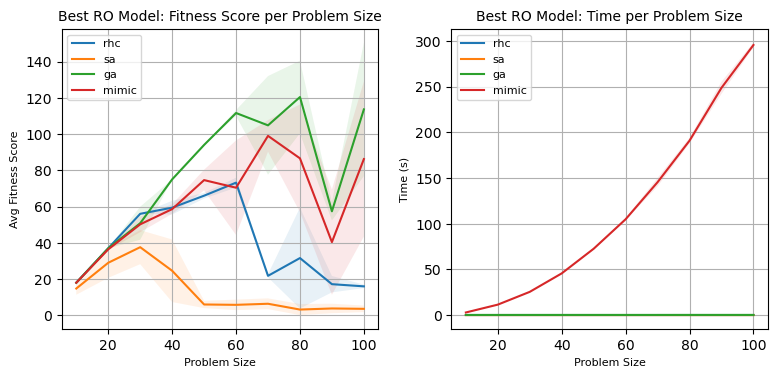

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
size = [*range(10, 110, 10)]
axs[0].plot(size, rhc_fitness_scores, label='rhc')
axs[0].fill_between(size, rhc_fitness_scores_ci_down, rhc_fitness_scores_ci_up, alpha=0.1)
axs[0].plot(size, sa_fitness_scores, label='sa')
axs[0].fill_between(size, sa_fitness_scores_ci_down, sa_fitness_scores_ci_up, alpha=0.1)
axs[0].plot(size, ga_fitness_scores, label='ga')
axs[0].fill_between(size, ga_fitness_scores_ci_down, ga_fitness_scores_ci_up, alpha=0.1)
axs[0].plot(size, mimic_fitness_scores, label='mimic')
axs[0].fill_between(size, mimic_fitness_scores_ci_down, mimic_fitness_scores_ci_up, alpha=0.1)
axs[0].set_title('Best RO Model: Fitness Score per Problem Size', fontsize=10)
axs[0].set_xlabel('Problem Size', fontsize=8)
axs[0].set_ylabel('Avg Fitness Score', fontsize=8)
axs[0].legend(loc='best', fontsize=8)
axs[0].grid()

axs[1].plot(size, rhc_fitness_time, label='rhc')
axs[1].fill_between(size, rhc_fitness_time_ci_down, rhc_fitness_time_ci_up, alpha=0.1)
axs[1].plot(size, sa_fitness_time, label='sa')
axs[1].fill_between(size, sa_fitness_time_ci_down, sa_fitness_time_ci_up, alpha=0.1)
axs[1].plot(size, ga_fitness_time, label='ga')
axs[1].fill_between(size, ga_fitness_time_ci_down, ga_fitness_time_ci_up, alpha=0.1)
axs[1].plot(size, mimic_fitness_time, label='mimic')
axs[1].fill_between(size, mimic_fitness_time_ci_down, mimic_fitness_time_ci_up, alpha=0.1)
axs[1].set_title('Best RO Model: Time per Problem Size', fontsize=10)
axs[1].set_xlabel('Problem Size', fontsize=8)
axs[1].set_ylabel('Time (s)', fontsize=8)
axs[1].legend(loc='best', fontsize=8)
axs[1].grid()

fig.tight_layout(pad = 1.5)
plt.savefig('plots/fourpeaks_best_fitness_problem_size.png', dpi=1200)
plt.show()

### Best Fitness vs Iteration

In [88]:
# Define fitness function
problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness, maximize = True)

In [89]:
rhc_array = []
sa_array = []
ga_array = []
mimic_array = []
for seed in seeds:
    # Define optimization problem object
    problem = mlrose.DiscreteOpt(length = 80, fitness_fn = fitness, maximize = True)
    
    # Randomized Hill Climbing
    start_time = time.time()
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem = problem, restarts = 100, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    rhc_time = end_time - start_time
    rhc_array.append([rhc_time, rhc_fitness_curve])

    # Simulated Annealing
    start_time = time.time()
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem = problem, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    sa_time = end_time - start_time
    sa_array.append([sa_time, sa_fitness_curve])

    # Genetic Algorithm
    start_time = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem = problem, pop_size = 50, mutation_prob = .75, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    ga_time = end_time - start_time
    ga_array.append([ga_time, ga_fitness_curve])

    # MIMIC
    start_time = time.time()
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(problem = problem, pop_size = 200, keep_pct = .1, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    mimic_time = end_time - start_time
    mimic_array.append([mimic_time, mimic_fitness_curve])

In [90]:
rhc_fitness_scores = []
rhc_fitness_time = []
for j in range(len(rhc_array)):
    rhc_fitness_scores.append(rhc_array[j][1])
    rhc_fitness_time.append(rhc_array[j][0])
rhc_fitness_time_ci = 1.96 * np.std(np.array(rhc_fitness_time)) / np.sqrt(len(rhc_fitness_time))
rhc_fitness_time = sum(rhc_fitness_time) / len(seeds)
rhc_fitness_ci = (1.96 * np.std(np.array(rhc_fitness_scores), axis = 0) / np.sqrt(len(rhc_fitness_scores)))[:,0]
rhc_feval_ci = (1.96 * np.std(np.array(rhc_fitness_scores), axis = 0) / np.sqrt(len(rhc_fitness_scores)))[:,1]
rhc_fitness_scores = np.mean(np.array(rhc_fitness_scores), axis = 0)
rhc_feval_scores = rhc_fitness_scores[:,1]
rhc_fitness_scores = rhc_fitness_scores[:,0]


sa_fitness_scores = []
sa_fitness_time = []
for j in range(len(sa_array)):
    sa_fitness_scores.append(sa_array[j][1])
    sa_fitness_time.append(sa_array[j][0])
sa_fitness_time_ci = 1.96 * np.std(np.array(sa_fitness_time)) / np.sqrt(len(sa_fitness_time))
sa_fitness_time = sum(sa_fitness_time) / len(seeds)
sa_fitness_ci = (1.96 * np.std(np.array(sa_fitness_scores), axis = 0) / np.sqrt(len(sa_fitness_scores)))[:,0]
sa_feval_ci = (1.96 * np.std(np.array(sa_fitness_scores), axis = 0) / np.sqrt(len(sa_fitness_scores)))[:,1]
sa_fitness_scores = np.mean(np.array(sa_fitness_scores), axis = 0)
sa_feval_scores = sa_fitness_scores[:,1]
sa_fitness_scores = sa_fitness_scores[:,0]


ga_fitness_scores = []
ga_fitness_time = []
for j in range(len(ga_array)):
    ga_fitness_scores.append(ga_array[j][1])
    ga_fitness_time.append(ga_array[j][0])
ga_fitness_time_ci = 1.96 * np.std(np.array(ga_fitness_time)) / np.sqrt(len(ga_fitness_time))
ga_fitness_time = sum(ga_fitness_time) / len(seeds)
ga_fitness_ci = (1.96 * np.std(np.array(ga_fitness_scores), axis = 0) / np.sqrt(len(ga_fitness_scores)))[:,0]
ga_feval_ci = (1.96 * np.std(np.array(ga_fitness_scores), axis = 0) / np.sqrt(len(ga_fitness_scores)))[:,1]
ga_fitness_scores = np.mean(np.array(ga_fitness_scores), axis = 0)
ga_feval_scores = ga_fitness_scores[:,1]
ga_fitness_scores = ga_fitness_scores[:,0]


mimic_fitness_scores = []
mimic_fitness_time = []
for j in range(len(mimic_array)):
    mimic_fitness_scores.append(mimic_array[j][1])
    mimic_fitness_time.append(mimic_array[j][0])
mimic_fitness_time_ci = 1.96 * np.std(np.array(mimic_fitness_time)) / np.sqrt(len(mimic_fitness_time))
mimic_fitness_time = sum(mimic_fitness_time) / len(seeds)
mimic_fitness_ci = (1.96 * np.std(np.array(mimic_fitness_scores), axis = 0) / np.sqrt(len(mimic_fitness_scores)))[:,0]
mimic_feval_ci = (1.96 * np.std(np.array(mimic_fitness_scores), axis = 0) / np.sqrt(len(mimic_fitness_scores)))[:,1]
mimic_fitness_scores = np.mean(np.array(mimic_fitness_scores), axis = 0)
mimic_feval_scores = mimic_fitness_scores[:,1]
mimic_fitness_scores = mimic_fitness_scores[:,0]

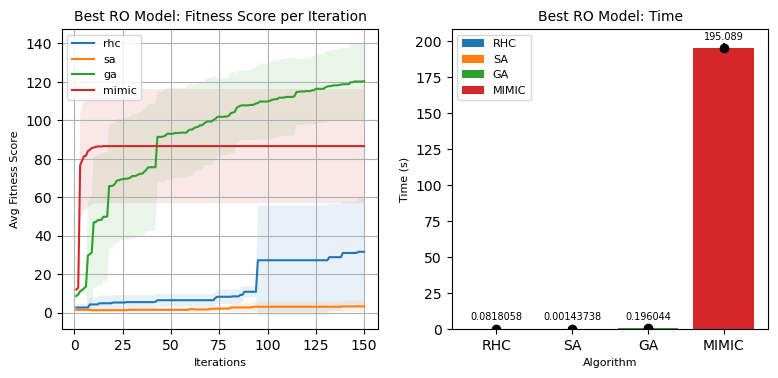

In [108]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
iterations = range(1, max_iters+1)
axs[0].plot(iterations, rhc_fitness_scores, label='rhc')
axs[0].fill_between(iterations, rhc_fitness_scores - rhc_fitness_ci, rhc_fitness_scores + rhc_fitness_ci, alpha=0.1)
axs[0].plot(iterations, sa_fitness_scores, label='sa')
axs[0].fill_between(iterations, sa_fitness_scores - sa_fitness_ci, sa_fitness_scores + sa_fitness_ci, alpha=0.1)
axs[0].plot(iterations, ga_fitness_scores, label='ga')
axs[0].fill_between(iterations, ga_fitness_scores - ga_fitness_ci, ga_fitness_scores + ga_fitness_ci, alpha=0.1)
axs[0].plot(iterations, mimic_fitness_scores, label='mimic')
axs[0].fill_between(iterations, mimic_fitness_scores - mimic_fitness_ci, mimic_fitness_scores + mimic_fitness_ci, alpha=0.1)
axs[0].set_title('Best RO Model: Fitness Score per Iteration', fontsize=10)
axs[0].set_xlabel('Iterations', fontsize=8)
axs[0].set_ylabel('Avg Fitness Score', fontsize=8)
axs[0].legend(loc='best', fontsize=8)
axs[0].grid()

algos = ['RHC', 'SA', 'GA', 'MIMIC']
times = [rhc_fitness_time, sa_fitness_time, ga_fitness_time, mimic_fitness_time]
error = [rhc_fitness_time_ci, sa_fitness_time_ci, ga_fitness_time_ci, mimic_fitness_time_ci]
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
axs[1].errorbar(algos, times, yerr=error, fmt="o", color="0")
# axs[1].bar(algos, times, label=algos, color=bar_colors)
axs[1].bar_label(axs[1].bar(algos, times, label=algos, color=bar_colors), label_type='edge', fontsize=7, padding=5)
axs[1].set_title('Best RO Model: Time', fontsize=10)
axs[1].set_xlabel('Algorithm', fontsize=8)
axs[1].set_ylabel('Time (s)', fontsize=8)
axs[1].legend(loc='best', fontsize=8)

fig.tight_layout(pad = 1.5)
plt.savefig('plots/fourpeaks_best_fitness_iteration.png', dpi=1200)
plt.show()

In [109]:
print('RHC Fitness: ', rhc_fitness_scores[-1])
print('SA Fitness: ', sa_fitness_scores[-1])
print('GA Fitness: ', ga_fitness_scores[-1])
print('MIMIC Fitness: ', mimic_fitness_scores[-1])

RHC Fitness:  31.6
SA Fitness:  3.2
GA Fitness:  120.4
MIMIC Fitness:  86.6


In [110]:
print('RHC Time: ', rhc_fitness_time)
print('SA Time: ', sa_fitness_time)
print('GA Time: ', ga_fitness_time)
print('MIMIC Time: ', mimic_fitness_time)

RHC Time:  0.08180584907531738
SA Time:  0.0014373779296875
GA Time:  0.1960437774658203
MIMIC Time:  195.08858075141907


### Feature Evaluations vs Iterations

In [111]:
print('RHC Fevals: ', rhc_feval_scores[-1])
print('SA Fevals: ', sa_feval_scores[-1])
print('GA Fevals: ', ga_feval_scores[-1])
print('MIMIC Fevals: ', mimic_feval_scores[-1])

RHC Fevals:  2765.4
SA Fevals:  297.2
GA Fevals:  7722.2
MIMIC Fevals:  30356.4


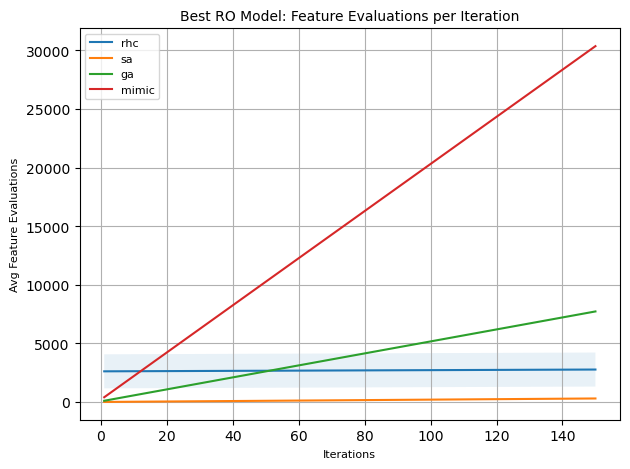

In [92]:
iterations = range(1, max_iters+1)
plt.plot(iterations, rhc_feval_scores, label='rhc')
plt.fill_between(iterations, rhc_feval_scores - rhc_feval_ci, rhc_feval_scores + rhc_feval_ci, alpha=0.1)
plt.plot(iterations, sa_feval_scores, label='sa')
plt.fill_between(iterations, sa_feval_scores - sa_feval_ci, sa_feval_scores + sa_feval_ci, alpha=0.1)
plt.plot(iterations, ga_feval_scores, label='ga')
plt.fill_between(iterations, ga_feval_scores - ga_feval_ci, ga_feval_scores + ga_feval_ci, alpha=0.1)
plt.plot(iterations, mimic_feval_scores, label='mimic')
plt.fill_between(iterations, mimic_feval_scores - mimic_feval_ci, mimic_feval_scores + mimic_feval_ci, alpha=0.1)
plt.title('Best RO Model: Feature Evaluations per Iteration', fontsize=10)
plt.xlabel('Iterations', fontsize=8)
plt.ylabel('Avg Feature Evaluations', fontsize=8)
plt.legend(loc='best', fontsize=8)
plt.tight_layout()
plt.grid()

plt.savefig('plots/fourpeaks_best_feval_iteration.png', dpi=1200)
plt.show()

## Size: 20,40

### Feature Evaluation Analysis

In [141]:
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness, maximize = True)
iterations = range(10, 160, 10)

In [142]:
# Randomized Hill Climbing
rhc_stats = []
rhc_curves = []
for seed in seeds:
    

    rhc = mlrose.RHCRunner(problem=problem,
                    experiment_name='four_peaks_rhc',
                    output_directory='./feval_outputs',
                    seed=seed,
                    iteration_list=[*iterations],
                    max_attempts=max_attempts,
                    restart_list=[0, 25, 75, 100])   

    # the two data frames will contain the results
    rhc_df_run_stats, rhc_df_run_curves = rhc.run()
    rhc_stats.append(rhc_df_run_stats)
    rhc_curves.append(rhc_df_run_curves)

ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler


In [143]:
rhc_best_fitness = pd.DataFrame()
for i in range(len(rhc_curves)):
    best_fitness = rhc_curves[i]['Fitness'].max()
    best_runs = rhc_curves[i][rhc_curves[i]['Fitness'] == best_fitness]
    rhc_best_fitness = pd.concat([rhc_best_fitness, best_runs])

In [144]:
rhc_best_fitness

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
543,1,0.007089,27.0,301.0,75,150,27
544,2,0.007120,27.0,302.0,75,150,27
545,3,0.007146,27.0,303.0,75,150,27
546,4,0.007171,27.0,304.0,75,150,27
547,5,0.007197,27.0,305.0,75,150,27
...,...,...,...,...,...,...,...
1779,6,0.002009,28.0,794.0,100,150,74
1780,7,0.002017,28.0,795.0,100,150,74
1781,8,0.002025,28.0,796.0,100,150,74
1782,9,0.002033,28.0,797.0,100,150,74


In [145]:
rhc_min_evals = rhc_best_fitness['FEvals'].min()
rhc_best_curve_run = rhc_best_fitness[rhc_best_fitness['FEvals'] == rhc_min_evals]

In [146]:
rhc_best_curve_run

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
89,8,0.001825,28.0,83.0,25,150,7
350,8,0.001825,28.0,83.0,75,150,7
1111,8,0.001825,28.0,83.0,100,150,7


In [147]:
# Simulated Annealing
sa_stats = []
sa_curves = []
for seed in seeds:
    sa = mlrose.SARunner(problem=problem,
                  experiment_name='four_peaks_sa',
                  output_directory='./feval_outputs',
                  seed=seed,
                  iteration_list=[*iterations],
                  max_attempts=max_attempts,
                  temperature_list=[.001, .01, .1, .25, .5, .75, 1],
                  decay_list=[mlrose.GeomDecay])

    # the two data frames will contain the results
    sa_df_run_stats, sa_df_run_curves = sa.run()
    sa_stats.append(sa_df_run_stats)
    sa_curves.append(sa_df_run_curves)

ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler


In [148]:
sa_best_fitness = pd.DataFrame()
for i in range(len(sa_curves)):
    best_fitness = sa_curves[i]['Fitness'].max()
    best_runs = sa_curves[i][sa_curves[i]['Fitness'] == best_fitness]
    sa_best_fitness = pd.concat([sa_best_fitness, best_runs])

In [149]:
sa_best_fitness

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
8,8,0.005164,6.0,16.0,0.001,150
9,9,0.005203,6.0,18.0,0.001,150
10,10,0.005220,6.0,19.0,0.001,150
19,8,0.005164,6.0,16.0,0.01,150
20,9,0.005203,6.0,18.0,0.01,150
...,...,...,...,...,...,...
54,10,0.002266,2.0,20.0,0.5,150
64,9,0.002253,2.0,18.0,0.75,150
65,10,0.002266,2.0,20.0,0.75,150
75,9,0.002253,2.0,18.0,1,150


In [150]:
sa_min_evals = sa_best_fitness['FEvals'].min()
sa_best_curve_run = sa_best_fitness[sa_best_fitness['FEvals'] == sa_min_evals]

In [151]:
sa_best_curve_run

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000062,1.0,0.0,0.001,150
11,0,0.000062,1.0,0.0,0.01,150
22,0,0.000062,1.0,0.0,0.1,150
33,0,0.000062,1.0,0.0,0.25,150
44,0,0.000062,1.0,0.0,0.5,150
55,0,0.000062,1.0,0.0,0.75,150
66,0,0.000062,1.0,0.0,1,150


In [152]:
# Genetic Algorithm
ga_stats = []
ga_curves = []
for seed in seeds:
    ga = mlrose.GARunner(problem=problem,
                  experiment_name='four_peaks_ga',
                  output_directory='./feval_outputs', # note: specify an output directory to have results saved to disk
                  seed=seed,
                  iteration_list=[*iterations],
                  max_attempts = max_attempts,
                  population_sizes=[10, 20, 50, 100, 150, 200, 250, 500],
                  mutation_rates=[0.1, 0.2, 0.5, 0.75, 1])

    # the two data frames will contain the results
    ga_df_run_stats, ga_df_run_curves = ga.run()
    ga_stats.append(ga_df_run_stats)
    ga_curves.append(ga_df_run_curves)

ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler


In [153]:
ga_best_fitness = pd.DataFrame()
for i in range(len(ga_curves)):
    best_fitness = ga_curves[i]['Fitness'].max()
    best_runs = ga_curves[i][ga_curves[i]['Fitness'] == best_fitness]
    ga_best_fitness = pd.concat([ga_best_fitness, best_runs])

In [154]:
ga_best_fitness

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
175,10,0.006044,37.0,1115.0,100,0.1,150
223,3,0.004416,37.0,606.0,150,0.1,150
224,4,0.004684,37.0,757.0,150,0.1,150
225,5,0.004915,37.0,908.0,150,0.1,150
226,6,0.005146,37.0,1059.0,150,0.1,150
...,...,...,...,...,...,...,...
406,10,0.004167,37.0,5513.0,500,0.2,150
414,7,0.003538,37.0,4010.0,500,0.5,150
415,8,0.003749,37.0,4511.0,500,0.5,150
416,9,0.003957,37.0,5012.0,500,0.5,150


In [155]:
ga_min_evals = ga_best_fitness['FEvals'].min()
ga_best_curve_run = ga_best_fitness[ga_best_fitness['FEvals'] == ga_min_evals]

In [156]:
ga_best_curve_run

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
115,5,0.003275,37.0,310.0,50,0.1,150


In [157]:
# MIMIC
mimic_stats = []
mimic_curves = []
for seed in seeds:
    mmc = mlrose.MIMICRunner(problem=problem,
                      experiment_name='four_peaks_mimic',
                      output_directory='./feval_outputs',
                      seed=seed,
                      iteration_list=[*iterations],
                      max_attempts=max_attempts,
                      population_sizes = [10, 20, 50, 100, 150, 200, 250, 500],
                      keep_percent_list=[0.1, 0.25, 0.5, 0.75, 0.9],
                      use_fast_mimic = True)
                      
    # the two data frames will contain the results
    mimic_df_run_stats, mimic_df_run_curves = mmc.run()
    mimic_stats.append(mimic_df_run_stats)
    mimic_curves.append(mimic_df_run_curves)

ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler
ERROR:root:Problem restoring SIGNINT handler


In [158]:
mimic_best_fitness = pd.DataFrame()
for i in range(len(mimic_curves)):
    best_fitness = mimic_curves[i]['Fitness'].max()
    best_runs = mimic_curves[i][mimic_curves[i]['Fitness'] == best_fitness]
    mimic_best_fitness = pd.concat([mimic_best_fitness, best_runs])

In [159]:
mimic_best_fitness

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
333,3,0.009540,37.0,1006.0,True,250,0.10,150
334,4,0.011330,37.0,1257.0,True,250,0.10,150
335,5,0.013121,37.0,1508.0,True,250,0.10,150
336,6,0.015245,37.0,1759.0,True,250,0.10,150
337,7,0.017337,37.0,2010.0,True,250,0.10,150
...,...,...,...,...,...,...,...,...
403,7,0.015388,37.0,4011.0,True,500,0.25,150
404,8,0.017164,37.0,4512.0,True,500,0.25,150
405,9,0.018915,37.0,5013.0,True,500,0.25,150
406,10,0.020644,37.0,5514.0,True,500,0.25,150


In [160]:
mimic_min_evals = mimic_best_fitness['FEvals'].min()
mimic_best_curve_run = mimic_best_fitness[mimic_best_fitness['FEvals'] == mimic_min_evals]

In [161]:
mimic_best_curve_run

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
277,2,0.005697,37.0,604.0,True,200,0.1,150


### Best Fitness vs Iteration

In [162]:
# Define fitness function
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness, maximize = True)

In [163]:
rhc_array = []
sa_array = []
ga_array = []
mimic_array = []
for seed in seeds:
    # Define optimization problem object
    problem = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness, maximize = True)
    
    # Randomized Hill Climbing
    start_time = time.time()
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem = problem, restarts = 100, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    rhc_time = end_time - start_time
    rhc_array.append([rhc_time, rhc_fitness_curve])

    # Simulated Annealing
    start_time = time.time()
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem = problem, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    sa_time = end_time - start_time
    sa_array.append([sa_time, sa_fitness_curve])

    # Genetic Algorithm
    start_time = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem = problem, pop_size = 50, mutation_prob = .1, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    ga_time = end_time - start_time
    ga_array.append([ga_time, ga_fitness_curve])

    # MIMIC
    start_time = time.time()
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(problem = problem, pop_size = 200, keep_pct = .1, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    mimic_time = end_time - start_time
    mimic_array.append([mimic_time, mimic_fitness_curve])

In [164]:
rhc_fitness_scores = []
rhc_fitness_time = []
for j in range(len(rhc_array)):
    rhc_fitness_scores.append(rhc_array[j][1])
    rhc_fitness_time.append(rhc_array[j][0])
rhc_fitness_time_ci = 1.96 * np.std(np.array(rhc_fitness_time)) / np.sqrt(len(rhc_fitness_time))
rhc_fitness_time = sum(rhc_fitness_time) / len(seeds)
rhc_fitness_ci = (1.96 * np.std(np.array(rhc_fitness_scores), axis = 0) / np.sqrt(len(rhc_fitness_scores)))[:,0]
rhc_feval_ci = (1.96 * np.std(np.array(rhc_fitness_scores), axis = 0) / np.sqrt(len(rhc_fitness_scores)))[:,1]
rhc_fitness_scores = np.mean(np.array(rhc_fitness_scores), axis = 0)
rhc_feval_scores = rhc_fitness_scores[:,1]
rhc_fitness_scores = rhc_fitness_scores[:,0]


sa_fitness_scores = []
sa_fitness_time = []
for j in range(len(sa_array)):
    sa_fitness_scores.append(sa_array[j][1])
    sa_fitness_time.append(sa_array[j][0])
sa_fitness_time_ci = 1.96 * np.std(np.array(sa_fitness_time)) / np.sqrt(len(sa_fitness_time))
sa_fitness_time = sum(sa_fitness_time) / len(seeds)
sa_fitness_ci = (1.96 * np.std(np.array(sa_fitness_scores), axis = 0) / np.sqrt(len(sa_fitness_scores)))[:,0]
sa_feval_ci = (1.96 * np.std(np.array(sa_fitness_scores), axis = 0) / np.sqrt(len(sa_fitness_scores)))[:,1]
sa_fitness_scores = np.mean(np.array(sa_fitness_scores), axis = 0)
sa_feval_scores = sa_fitness_scores[:,1]
sa_fitness_scores = sa_fitness_scores[:,0]


ga_fitness_scores = []
ga_fitness_time = []
for j in range(len(ga_array)):
    ga_fitness_scores.append(ga_array[j][1])
    ga_fitness_time.append(ga_array[j][0])
ga_fitness_time_ci = 1.96 * np.std(np.array(ga_fitness_time)) / np.sqrt(len(ga_fitness_time))
ga_fitness_time = sum(ga_fitness_time) / len(seeds)
ga_fitness_ci = (1.96 * np.std(np.array(ga_fitness_scores), axis = 0) / np.sqrt(len(ga_fitness_scores)))[:,0]
ga_feval_ci = (1.96 * np.std(np.array(ga_fitness_scores), axis = 0) / np.sqrt(len(ga_fitness_scores)))[:,1]
ga_fitness_scores = np.mean(np.array(ga_fitness_scores), axis = 0)
ga_feval_scores = ga_fitness_scores[:,1]
ga_fitness_scores = ga_fitness_scores[:,0]


mimic_fitness_scores = []
mimic_fitness_time = []
for j in range(len(mimic_array)):
    mimic_fitness_scores.append(mimic_array[j][1])
    mimic_fitness_time.append(mimic_array[j][0])
mimic_fitness_time_ci = 1.96 * np.std(np.array(mimic_fitness_time)) / np.sqrt(len(mimic_fitness_time))
mimic_fitness_time = sum(mimic_fitness_time) / len(seeds)
mimic_fitness_ci = (1.96 * np.std(np.array(mimic_fitness_scores), axis = 0) / np.sqrt(len(mimic_fitness_scores)))[:,0]
mimic_feval_ci = (1.96 * np.std(np.array(mimic_fitness_scores), axis = 0) / np.sqrt(len(mimic_fitness_scores)))[:,1]
mimic_fitness_scores = np.mean(np.array(mimic_fitness_scores), axis = 0)
mimic_feval_scores = mimic_fitness_scores[:,1]
mimic_fitness_scores = mimic_fitness_scores[:,0]

In [165]:
print('RHC Fitness: ', rhc_fitness_scores[-1])
print('SA Fitness: ', sa_fitness_scores[-1])
print('GA Fitness: ', ga_fitness_scores[-1])
print('MIMIC Fitness: ', mimic_fitness_scores[-1])

RHC Fitness:  37.0
SA Fitness:  29.0
GA Fitness:  37.0
MIMIC Fitness:  36.4


In [166]:
print('RHC Time: ', rhc_fitness_time)
print('SA Time: ', sa_fitness_time)
print('GA Time: ', ga_fitness_time)
print('MIMIC Time: ', mimic_fitness_time)

RHC Time:  0.11398444175720215
SA Time:  0.0014078140258789063
GA Time:  0.16239652633666993
MIMIC Time:  11.525311183929443


### Feature Evaluations vs Iterations

In [167]:
print('RHC Fevals: ', rhc_feval_scores[-1])
print('SA Fevals: ', sa_feval_scores[-1])
print('GA Fevals: ', ga_feval_scores[-1])
print('MIMIC Fevals: ', mimic_feval_scores[-1])

RHC Fevals:  406.8
SA Fevals:  244.4
GA Fevals:  7707.8
MIMIC Fevals:  30353.6
